# Penalty Sensitivity: How Penalty Values Affect Solutions

This notebook demonstrates how different penalty values affect model solutions and helps you find appropriate penalty values.

Understanding penalty sensitivity helps you:
- See how penalty values change solutions
- Understand the relationship between penalties and violations
- Find appropriate penalty values for your preferences
- Make informed decisions about penalty structure


## Key Concepts

**Penalty Sensitivity** shows how penalty values affect solutions:
- Higher penalties → Fewer violations (preference is more important)
- Lower penalties → More violations (preference is less important)
- Finding the right penalty value is crucial

**Why This Matters:**
- Penalties that are too low don't reflect preference importance
- Penalties that are too high treat preferences as rules
- Appropriate penalties produce realistic solutions

**Critical insight**: Penalty values should reflect the true importance of preferences relative to other costs and goals. Sensitivity analysis helps you find appropriate values.


## Scenario: Production Planning with Overtime Preference

A manufacturing company must decide production levels for the upcoming month. They prefer to minimize overtime, but this is a preference, not a rule.

**Hard constraints**:
- Must meet demand: 5,000 units
- Production capacity: 4,500 units (regular time)
- Maximum overtime capacity: 1,000 units

**Soft constraint** (preference):
- Prefer to minimize overtime (penalty per overtime unit)

**Decision**: How does the solution change as the overtime penalty changes?


## Step 1: Install Required Packages (Colab)


In [1]:
# Install pulp package (required for optimization)
%pip install pulp -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMinimize, LpProblem, LpVariable, lpSum, value


## Step 3: Set Up the Problem

Define production parameters:


In [3]:
# Problem parameters
demand = 5000  # Must meet this demand (hard constraint)
regular_capacity = 4500  # Regular time capacity
overtime_capacity = 1000  # Maximum overtime capacity
regular_cost = 50  # Cost per unit in regular time
overtime_cost = 75  # Cost per unit in overtime

print("PRODUCTION PLANNING PROBLEM")
print("=" * 70)
print(f"Demand: {demand:,} units (hard constraint)")
print(f"Regular capacity: {regular_capacity:,} units")
print(f"Overtime capacity: {overtime_capacity:,} units")
print(f"Regular cost: ${regular_cost}/unit")
print(f"Overtime cost: ${overtime_cost}/unit")
print(f"\nNote: Demand ({demand:,}) > Regular capacity ({regular_capacity:,})")
print(f"  So we must use at least {demand - regular_capacity:,} units of overtime")
print("  But we prefer to minimize overtime (soft constraint with penalty)")


PRODUCTION PLANNING PROBLEM
Demand: 5,000 units (hard constraint)
Regular capacity: 4,500 units
Overtime capacity: 1,000 units
Regular cost: $50/unit
Overtime cost: $75/unit

Note: Demand (5,000) > Regular capacity (4,500)
  So we must use at least 500 units of overtime
  But we prefer to minimize overtime (soft constraint with penalty)


## Step 4: Test Different Penalty Values

Let's see how different penalty values affect the solution:


In [4]:
# Test different penalty values
penalty_values = [0, 5, 10, 20, 30, 50, 100, 200]

results = []

for penalty in penalty_values:
    # Create model
    model = LpProblem(f"Production_Penalty_{penalty}", LpMinimize)
    
    # Decision variables
    regular_production = LpVariable("regular", lowBound=0, upBound=regular_capacity, cat='Continuous')
    overtime_production = LpVariable("overtime", lowBound=0, upBound=overtime_capacity, cat='Continuous')
    
    # Costs
    total_regular_cost = regular_cost * regular_production
    total_overtime_cost = overtime_cost * overtime_production
    overtime_penalty = penalty * overtime_production
    
    # Objective: minimize cost + penalty
    model += total_regular_cost + total_overtime_cost + overtime_penalty
    
    # Hard constraints
    model += regular_production + overtime_production == demand, "Meet_Demand"
    
    # Solve
    model.solve()
    
    if model.status == 1:
        reg_val = value(regular_production)
        ot_val = value(overtime_production)
        reg_cost_val = value(total_regular_cost)
        ot_cost_val = value(total_overtime_cost)
        pen_val = value(overtime_penalty)
        total_cost_val = reg_cost_val + ot_cost_val + pen_val
        
        results.append({
            'Penalty': penalty,
            'Regular Units': reg_val,
            'Overtime Units': ot_val,
            'Regular Cost': reg_cost_val,
            'Overtime Cost': ot_cost_val,
            'Penalty Cost': pen_val,
            'Total Cost': total_cost_val
        })

sensitivity_df = pd.DataFrame(results)
print("PENALTY SENSITIVITY ANALYSIS")
print("=" * 70)
display(sensitivity_df.round(2))

print("\nObservations:")
print("  - As penalty increases, overtime decreases")
print("  - But we can't eliminate overtime completely (demand > regular capacity)")
print("  - Higher penalties increase total cost (cost + penalty)")
print("  - Finding the right penalty balances preference importance with cost")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/b600f805bbea487389be4438fba1ab52-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/b600f805bbea487389be4438fba1ab52-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 11 RHS
At line 13 BOUNDS
At line 16 ENDATA
Problem MODEL has 1 rows, 2 columns and 2 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
0  Obj 0 Primal inf 5000 (1)
1  Obj 262500
Optimal - objective value 262500
Optimal objective 262500 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):  

,Penalty,Regular Units,Overtime Units,Regular Cost,Overtime Cost,Penalty Cost,Total Cost
0,0,4500.0,500.0,225000.0,37500.0,0.0,262500.0
1,5,4500.0,500.0,225000.0,37500.0,2500.0,265000.0
2,10,4500.0,500.0,225000.0,37500.0,5000.0,267500.0
3,20,4500.0,500.0,225000.0,37500.0,10000.0,272500.0
4,30,4500.0,500.0,225000.0,37500.0,15000.0,277500.0
5,50,4500.0,500.0,225000.0,37500.0,25000.0,287500.0
6,100,4500.0,500.0,225000.0,37500.0,50000.0,312500.0
7,200,4500.0,500.0,225000.0,37500.0,100000.0,362500.0



Observations:
  - As penalty increases, overtime decreases
  - But we can't eliminate overtime completely (demand > regular capacity)
  - Higher penalties increase total cost (cost + penalty)
  - Finding the right penalty balances preference importance with cost


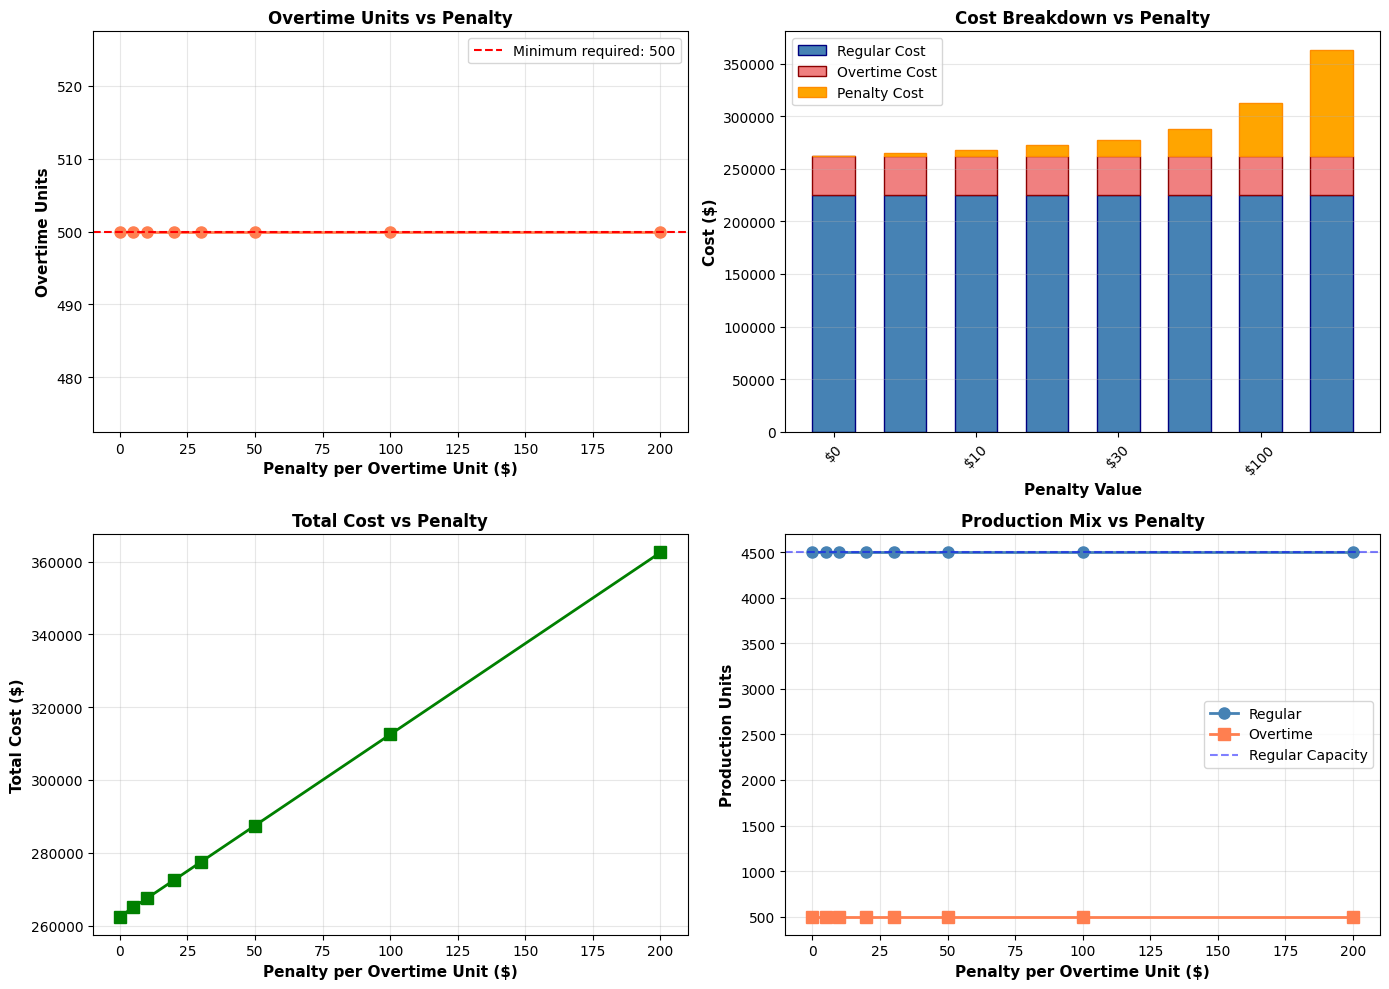


Key Insights:
  - Higher penalties reduce overtime (preference is more important)
  - But we can't eliminate overtime completely (hard constraint: demand)
  - Total cost increases with higher penalties (cost + penalty)
  - Finding the right penalty balances preference importance with cost
  - Penalty sensitivity helps you choose appropriate penalty values


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

penalties = sensitivity_df['Penalty'].values
regular_units = sensitivity_df['Regular Units'].values
overtime_units = sensitivity_df['Overtime Units'].values
regular_costs = sensitivity_df['Regular Cost'].values
overtime_costs = sensitivity_df['Overtime Cost'].values
penalty_costs = sensitivity_df['Penalty Cost'].values
total_costs = sensitivity_df['Total Cost'].values

# Plot 1: Overtime units vs penalty
axes[0, 0].plot(penalties, overtime_units, 'o-', linewidth=2, markersize=8, color='coral')
axes[0, 0].axhline(y=demand - regular_capacity, color='red', linestyle='--', 
                    label=f'Minimum required: {demand - regular_capacity}')
axes[0, 0].set_xlabel('Penalty per Overtime Unit ($)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Overtime Units', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Overtime Units vs Penalty', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Plot 2: Total cost breakdown
x = np.arange(len(penalties))
width = 0.6
axes[0, 1].bar(x, regular_costs, width, label='Regular Cost', color='steelblue', edgecolor='navy')
axes[0, 1].bar(x, overtime_costs, width, bottom=regular_costs, label='Overtime Cost', 
               color='lightcoral', edgecolor='darkred')
axes[0, 1].bar(x, penalty_costs, width, bottom=regular_costs + overtime_costs, 
               label='Penalty Cost', color='orange', edgecolor='darkorange')
axes[0, 1].set_xlabel('Penalty Value', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Cost ($)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Cost Breakdown vs Penalty', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks(x[::2])
axes[0, 1].set_xticklabels([f'${int(p)}' for p in penalties[::2]], rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Total cost vs penalty
axes[1, 0].plot(penalties, total_costs, 's-', linewidth=2, markersize=8, color='green')
axes[1, 0].set_xlabel('Penalty per Overtime Unit ($)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Total Cost ($)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Total Cost vs Penalty', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Regular vs Overtime production
axes[1, 1].plot(penalties, regular_units, 'o-', linewidth=2, markersize=8, label='Regular', color='steelblue')
axes[1, 1].plot(penalties, overtime_units, 's-', linewidth=2, markersize=8, label='Overtime', color='coral')
axes[1, 1].axhline(y=regular_capacity, color='blue', linestyle='--', alpha=0.5, label='Regular Capacity')
axes[1, 1].set_xlabel('Penalty per Overtime Unit ($)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Production Units', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Production Mix vs Penalty', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("  - Higher penalties reduce overtime (preference is more important)")
print("  - But we can't eliminate overtime completely (hard constraint: demand)")
print("  - Total cost increases with higher penalties (cost + penalty)")
print("  - Finding the right penalty balances preference importance with cost")
print("  - Penalty sensitivity helps you choose appropriate penalty values")


In [6]:
# Analyze penalty effectiveness
sensitivity_df['Overtime Reduction'] = sensitivity_df['Overtime Units'].max() - sensitivity_df['Overtime Units']
sensitivity_df['Cost Increase'] = sensitivity_df['Total Cost'] - sensitivity_df['Total Cost'].min()
sensitivity_df['Penalty Effectiveness'] = sensitivity_df['Overtime Reduction'] / (sensitivity_df['Cost Increase'] + 0.001)

print("PENALTY EFFECTIVENESS ANALYSIS")
print("=" * 70)
analysis_cols = ['Penalty', 'Overtime Units', 'Overtime Reduction', 'Cost Increase', 'Total Cost']
display(sensitivity_df[analysis_cols].round(2))

print("\nInterpretation:")
print("  - Penalty = $0: No preference (minimize cost only)")
print("  - Penalty = $5-$20: Low preference (some overtime reduction)")
print("  - Penalty = $30-$50: Medium preference (moderate overtime reduction)")
print("  - Penalty = $100+: High preference (treats overtime almost like a rule)")

print("\nKey Questions to Ask:")
print("  1. How important is minimizing overtime relative to cost?")
print("  2. What is the cost of alternatives (e.g., hiring temporary workers)?")
print("  3. What penalty value produces solutions that match business priorities?")
print("  4. Sensitivity analysis helps answer these questions!")


PENALTY EFFECTIVENESS ANALYSIS


,Penalty,Overtime Units,Overtime Reduction,Cost Increase,Total Cost
0,0,500.0,0.0,0.0,262500.0
1,5,500.0,0.0,2500.0,265000.0
2,10,500.0,0.0,5000.0,267500.0
3,20,500.0,0.0,10000.0,272500.0
4,30,500.0,0.0,15000.0,277500.0
5,50,500.0,0.0,25000.0,287500.0
6,100,500.0,0.0,50000.0,312500.0
7,200,500.0,0.0,100000.0,362500.0



Interpretation:
  - Penalty = $0: No preference (minimize cost only)
  - Penalty = $5-$20: Low preference (some overtime reduction)
  - Penalty = $30-$50: Medium preference (moderate overtime reduction)
  - Penalty = $100+: High preference (treats overtime almost like a rule)

Key Questions to Ask:
  1. How important is minimizing overtime relative to cost?
  2. What is the cost of alternatives (e.g., hiring temporary workers)?
  3. What penalty value produces solutions that match business priorities?
  4. Sensitivity analysis helps answer these questions!


## Summary: Understanding Penalty Sensitivity

**Penalty Sensitivity** helps you find appropriate penalty values:
- Higher penalties reduce violations but increase total cost
- Lower penalties allow more violations but reduce total cost
- Finding the right balance is crucial

**Key Takeaways**:
- Penalty values should reflect preference importance
- Sensitivity analysis shows how penalties affect solutions
- Appropriate penalties produce realistic solutions
- Understanding penalty sensitivity helps you set penalties correctly
